<a href="https://colab.research.google.com/github/johnsk95/CS4641/blob/master/Project3/heart_pr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import plotly.plotly as py
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive'

 breast-cancer
'Colab Notebooks'
'Deep Learning'
 heart-disease-uci
'Integrated approach to architecture and operating systems'
'Machine Learning'
 mice_protein_expression
 Quant
'scientific computing'
'Stock Team.gslides'
 tokyo
 vip


In [0]:
data = pd.read_csv('/content/drive/My Drive/heart-disease-uci/heart.csv')

In [0]:
# Split data into X and y
x = data.drop(["target"] , axis=1)
y = data["target"].values
# Normalization
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [0]:
pca = PCA(2)
projected = pca.fit_transform(x)

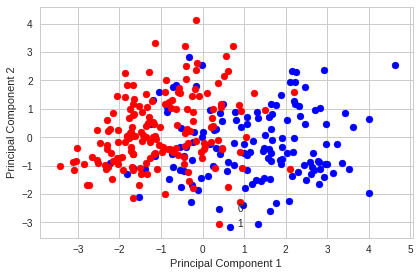

In [0]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, color in zip((0, 1), ('blue', 'red')):
        plt.scatter(projected[y==lab, 0],
                    projected[y==lab, 1],
                    label=lab,
                    c=color)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

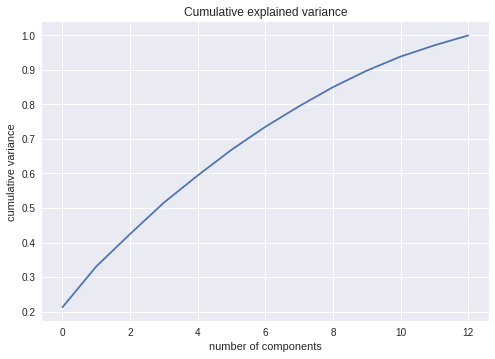

In [0]:
pca = PCA(13).fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative variance');
# The curve quantifies how much of the total, 12-dimensional variance is contained within the first N components. Here we can see that we need at least 9 components retain 90% of variance. 

In [0]:
pca = PCA().fit(x)
print(pca.explained_variance_)

[2.772176   1.54178039 1.22688342 1.18505659 1.02535054 0.97322784
 0.86562678 0.77851473 0.72130605 0.62362837 0.53186008 0.42454351
 0.37309206]


In [0]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [0]:
n_components = 12
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)


x = pd.DataFrame(data=x)
X_train_PCA = pca.fit_transform(x)
X_train_PCA = pd.DataFrame(data=X_train_PCA)
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse)
print(anomalyScores(x, X_train_PCA_inverse).mean)

<bound method Series.mean of 0      0.035020
1      0.014916
2      0.244172
3      0.004512
4      0.000957
5      0.100529
6      0.000155
7      0.000040
8      0.060933
9      0.062183
10     0.080213
11     0.084374
12     0.014994
13     0.011126
14     0.209902
15     0.000416
16     0.001620
17     0.009912
18     0.144276
19     0.067712
20     0.167363
21     0.005702
22     0.000019
23     0.020733
24     0.032757
25     0.024570
26     0.248443
27     0.161852
28     0.107287
29     0.139297
         ...   
273    0.002205
274    0.001444
275    0.003928
276    0.050430
277    0.024501
278    0.026352
279    0.149258
280    0.024968
281    0.020647
282    0.073370
283    0.000536
284    0.131017
285    0.000066
286    0.000139
287    0.004480
288    0.014389
289    0.001635
290    0.023959
291    0.002063
292    0.059031
293    0.086620
294    0.043723
295    0.538029
296    0.227422
297    0.056276
298    0.097782
299    0.004426
300    0.111765
301    0.024233
302    0.27

In [0]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

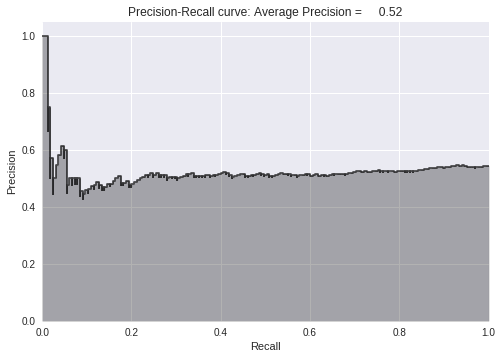

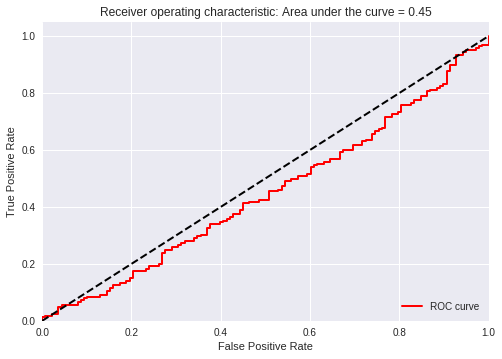

In [0]:
y = pd.DataFrame(data=y)
anomalyScoresPCA = anomalyScores(x, X_train_PCA_inverse)
preds = plotResults(y, anomalyScoresPCA, True)

In [0]:
from sklearn.random_projection import GaussianRandomProjection
n_components = 5
eps = None
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, random_state=random_state)

x = pd.DataFrame(data=x)
X_train_RP = GRP.fit_transform(x)
X_train_RP = pd.DataFrame(data=X_train_RP)

X_train_RP_inverse = np.array(X_train_RP).dot(GRP.components_)
X_train_RP_inverse = pd.DataFrame(data=X_train_RP_inverse)

print(anomalyScores(x, X_train_RP_inverse).mean)

<bound method Series.mean of 0      0.371126
1      0.145839
2      0.073573
3      0.024009
4      0.076335
5      0.047466
6      0.038335
7      0.089100
8      0.060331
9      0.038388
10     0.031827
11     0.026601
12     0.015165
13     0.402074
14     0.101993
15     0.001706
16     0.052955
17     0.083429
18     0.081760
19     0.066244
20     0.044409
21     0.155088
22     0.047099
23     0.143380
24     0.250950
25     0.211367
26     0.092036
27     0.166566
28     0.152361
29     0.236185
         ...   
273    0.024325
274    0.042780
275    0.062813
276    0.103524
277    0.019489
278    0.132047
279    0.145401
280    0.096164
281    0.236062
282    0.252240
283    0.128573
284    0.076043
285    0.076476
286    0.133171
287    0.011104
288    0.062052
289    0.264727
290    0.074608
291    0.226157
292    0.653638
293    0.091347
294    0.055094
295    0.258019
296    0.070550
297    0.454444
298    0.140691
299    0.394872
300    0.238806
301    0.058625
302    0.02

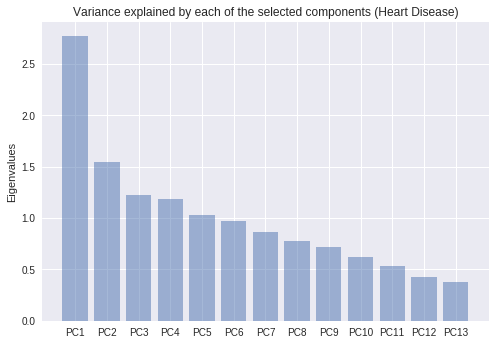

In [0]:
objects = ('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13')
y_pos = np.arange(len(objects))
performance = pca.explained_variance_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Eigenvalues')
plt.title('Variance explained by each of the selected components (Heart Disease)')
 
plt.show()

In [0]:
from scipy.stats import kurtosis, kurtosistest
from sklearn.decomposition import FastICA
train_df = pd.read_csv('/content/drive/My Drive/heart-disease-uci/heart.csv')

breast_y = train_df.iloc[:, -1:].as_matrix().flatten()
breast_x = train_df.iloc[:, :-1].as_matrix()

ica = FastICA(n_components = 5, max_iter = 1000)
kurt = []
loss = []
x = StandardScaler().fit_transform(breast_x)

for dim in range(1, breast_x.shape[1]):
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(x)
    df = pd.DataFrame(tmp)
    df = df.kurt(axis=0)
    kurt.append(kurtosistest(tmp).statistic.mean())
    proj = ica.inverse_transform(tmp)
    loss.append(((x - proj)**2).mean())

res = pd.DataFrame({"kurtosis": kurt, "loss": loss})


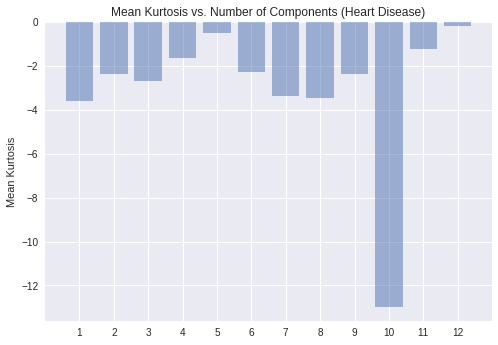

In [0]:
objects = []
for i in range(len(kurt)):
  objects.append(str(i+1))

y_pos = np.arange(len(kurt))
performance = pca.explained_variance_
 
plt.bar(y_pos, kurt, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Kurtosis')
plt.title('Mean Kurtosis vs. Number of Components (Heart Disease)')
 
plt.show()